# Blackwell Buying Patterns - EDA - Pipeline 

* Name: 
* Updated: 2022.03.11



### The objective of this task is to answer the following questions:

#### Task 1 
* 1a) Do customers in different regions spend more per transaction?
* 1b) Which regions spend the most/least? 
* 2)  Is there a relationship between the number of items purchased and amount spent?


# Import packages

In [1]:
# DS Basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# SKLearn Stuff
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# helpers
%matplotlib inline

# Grahpviz 
from six import StringIO 
from IPython.display import Image 
from sklearn.tree import export_graphviz



In [2]:
# pip list

# Import data

In [3]:
#!pwd
#!ls

In [4]:
data = pd.read_csv('Demographic_Data.csv')
print(data.shape)


(80000, 5)


# Evaluate data

In [5]:
data.dtypes

in-store      int64
age           int64
items         int64
amount      float64
region        int64
dtype: object

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80000 entries, 0 to 79999
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   in-store  80000 non-null  int64  
 1   age       80000 non-null  int64  
 2   items     80000 non-null  int64  
 3   amount    80000 non-null  float64
 4   region    80000 non-null  int64  
dtypes: float64(1), int64(4)
memory usage: 3.1 MB


In [7]:
data.head(10)

,in-store,age,items,amount,region
0,0,37,4,281.0300,2
1,0,35,2,219.5100,2
2,1,45,3,1525.7000,4
3,1,46,3,715.2500,3
4,1,33,4,1937.5000,1
5,0,24,3,1314.2000,4
6,0,43,6,8.5472,2
7,1,66,5,819.9800,3
8,1,51,5,908.3100,1
9,1,47,3,767.5400,1


# Preprocess

### Duplicates

In [8]:
data.duplicated().any()

True

In [9]:
print(data[data.duplicated()].shape)
data[data.duplicated()]

(21, 5)


,in-store,age,items,amount,region
17858,0,76,6,283.61,2
26112,0,67,4,320.41,2
29343,1,23,2,1019.50,4
33834,1,38,3,1993.80,1
34214,1,31,5,1488.10,4
34706,0,39,5,1268.00,4
35971,0,38,7,391.51,2
43958,1,22,1,1303.20,4
44308,1,26,5,1495.70,4
45164,0,79,6,342.28,2


In [10]:
data = data.drop_duplicates()
data.duplicated().any()

False

### Null values

In [11]:
data.isnull().any()
data.isnull().sum()

in-store    0
age         0
items       0
amount      0
region      0
dtype: int64

### Discretize

* Discretize amount and age
* Use '?' to get help for a function - e.g., ?pd.cut

In [12]:
# pd.cut

In [13]:
# Discretize amount - eg., 0-1000, 1001-2000, 2001+
# see pd.cut() & pd.qcut() in the Pandas_Cheat_Sheet reference 
cutoff= [0,1000,2000,3000]
labels=['0-1000', '1001-2000', '2001+']
data['amtBin']= pd.cut(data['amount'], bins=cutoff, labels=labels)
data.head(10)

,in-store,age,items,amount,region,amtBin
0,0,37,4,281.0300,2,0-1000
1,0,35,2,219.5100,2,0-1000
2,1,45,3,1525.7000,4,1001-2000
3,1,46,3,715.2500,3,0-1000
4,1,33,4,1937.5000,1,1001-2000
5,0,24,3,1314.2000,4,1001-2000
6,0,43,6,8.5472,2,0-1000
7,1,66,5,819.9800,3,0-1000
8,1,51,5,908.3100,1,0-1000
9,1,47,3,767.5400,1,0-1000


In [14]:
# Discretize age - eg., 18-33, 34-49, 50-64, 65+
cutoff1= [18,33,49,64,85]
labels1=['18-33', '34-49', '50-64', '65+']
data['ageBin']= pd.cut(data['age'], bins=cutoff1, labels=labels1)
data.head(10)

,in-store,age,items,amount,region,amtBin,ageBin
0,0,37,4,281.0300,2,0-1000,34-49
1,0,35,2,219.5100,2,0-1000,34-49
2,1,45,3,1525.7000,4,1001-2000,34-49
3,1,46,3,715.2500,3,0-1000,34-49
4,1,33,4,1937.5000,1,1001-2000,18-33
5,0,24,3,1314.2000,4,1001-2000,18-33
6,0,43,6,8.5472,2,0-1000,34-49
7,1,66,5,819.9800,3,0-1000,65+
8,1,51,5,908.3100,1,0-1000,50-64
9,1,47,3,767.5400,1,0-1000,34-49


In [15]:
# add amtBin and ageBin to the dataset

# Analyze Data
### Statistical Analysis

In [16]:
# output statistics
data.describe()

,in-store,age,items,amount,region
count,79979.000000,79979.000000,79979.000000,79979.000000,79979.000000
mean,0.500006,45.758512,4.505133,835.825727,2.674915
std,0.500003,15.715158,2.061250,721.263650,1.126642
min,0.000000,18.000000,1.000000,5.004700,1.000000
25%,0.000000,33.000000,3.000000,285.120000,2.000000
50%,1.000000,45.000000,4.000000,582.140000,3.000000
75%,1.000000,56.000000,6.000000,1233.400000,4.000000
max,1.000000,85.000000,8.000000,3000.000000,4.000000


### Visualizations

In [17]:
header = data.dtypes.index
print(header)

Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


#### Histogram

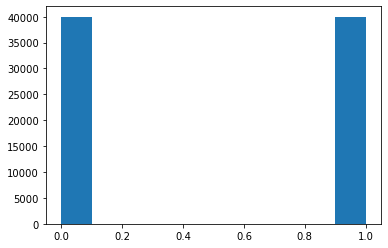

In [18]:
plt.hist(data['in-store'])
plt.show()

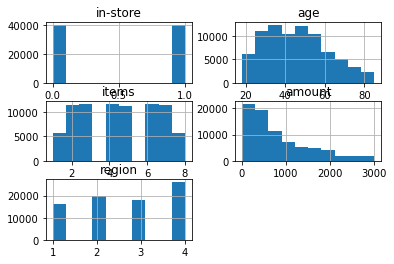

In [19]:
data.hist()
plt.show()

#### Scatter

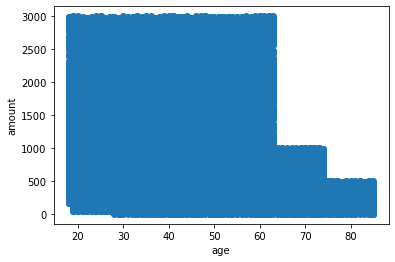

In [20]:
# Scatter plot example
data_sample = data
x = data_sample['age']
y = data_sample['amount']
plt.scatter(x,y, marker='o')
# assignment: add axis titles
plt.ylabel('amount')
plt.xlabel('age')
plt.show()


Index(['in-store', 'age', 'items', 'amount', 'region', 'amtBin', 'ageBin'], dtype='object')


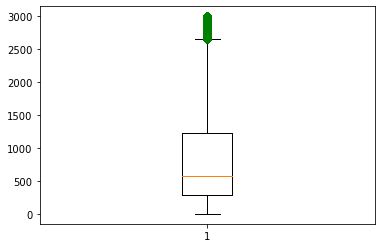

In [21]:
# Box plot example
# eval col names/features
header = data.dtypes.index
print(header)
# plot
A = data['amount']
plt.boxplot(A,0,'gD')
plt.show()


#### Stacked Col 
Use a stacked column chart to answer the following business questions. Here is a link to a good resource: https://stackoverflow.com/questions/48799718/pandas-pivot-table-to-stacked-bar-chart
* 1a) Do customers in different regions spend more per transaction (number of obs per spend category)?
* 1b) Which regions spend the most/least (overall - just from looking at the chart)? 

<AxesSubplot:xlabel='region'>

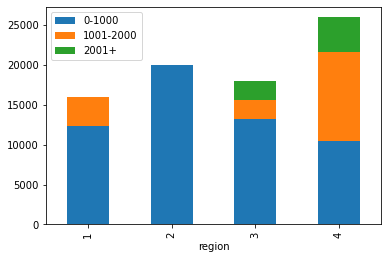

In [32]:
data.groupby('region')['amtBin']\
    .value_counts()\
    .unstack(level=1)\
    .plot.bar(stacked=True)
    



In [29]:
data.amount.mean()
data.groupby('region').amount.mean()

region
1     744.990939
2     252.097741
3     917.969637
4    1283.938357
Name: amount, dtype: float64

<AxesSubplot:title={'center':'Mean amount spend by region'}, xlabel='region'>

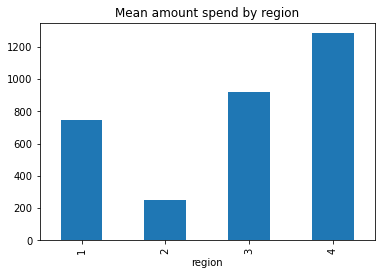

In [48]:
data.groupby('region').amount.mean().plot(kind='bar',title='Mean amount spend by region')

In [41]:
data.groupby('region').amount.agg(['count','max', 'min','mean'])

,count,max,min,mean
region,,,,
1,15997,1999.80,50.0500,744.990939
2,19994,499.94,5.0047,252.097741
3,18000,3000.00,50.1320,917.969637
4,25988,3000.00,50.6000,1283.938357


In [42]:
data.groupby('region').mean()

,in-store,age,items,amount
region,,,,
1,1.000000,43.704132,4.510283,744.990939
2,0.000000,56.609083,4.512804,252.097741
3,0.611056,45.646944,4.494000,917.969637
4,0.500000,38.752424,4.503771,1283.938357


#### Other visualizations from Titanic tutorial

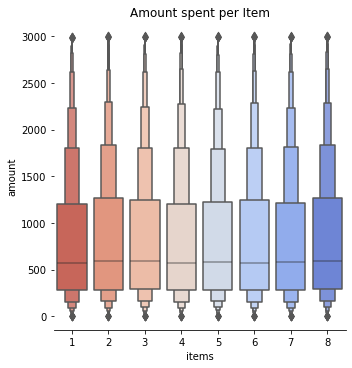

In [36]:
g = sns.catplot(
    data=data, kind="boxen",
    x="items", y="amount", palette="coolwarm_r").set(title='Amount spent per Item')
g.despine(left=True)

# Feature Selection
For this task, you will not be selecting features. Instead, focus on answering the following question (pay particular attention to correlation analysis):
* 2) Is there a relationship between the number of items purchased and amount spent?


### Correlation

In [33]:
corr_mat = data.corr()
print(corr_mat)

          in-store       age     items    amount    region
in-store  1.000000 -0.178180 -0.003897 -0.085573 -0.133171
age      -0.178180  1.000000  0.000657 -0.282033 -0.235370
items    -0.003897  0.000657  1.000000  0.000384 -0.001904
amount   -0.085573 -0.282033  0.000384  1.000000  0.403486
region   -0.133171 -0.235370 -0.001904  0.403486  1.000000


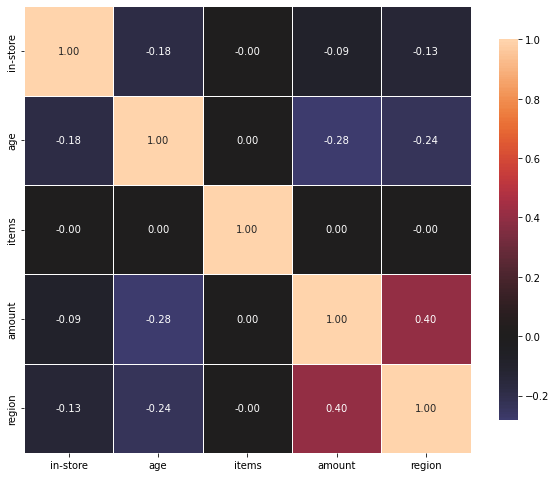

In [34]:
# plot heatmap
fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(corr_mat, vmax=1.0, center=0, fmt='.2f',
square=True, linewidths=.5, annot=True, cbar_kws={"shrink": .70})
plt.show();

### Covariance

In [35]:
cov_mat = data.cov()
print(cov_mat)

           in-store          age     items         amount      region
in-store   0.250003    -1.400071 -0.004017     -30.860425   -0.075019
age       -1.400071   246.966189  0.021270   -3196.782841   -4.167305
items     -0.004017     0.021270  4.248751       0.570791   -0.004421
amount   -30.860425 -3196.782841  0.570791  520221.252295  327.874873
region    -0.075019    -4.167305 -0.004421     327.874873    1.269321
